# Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
sns.set(rc={'figure.figsize':(12, 10)})

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Anlaysing Numerical Values

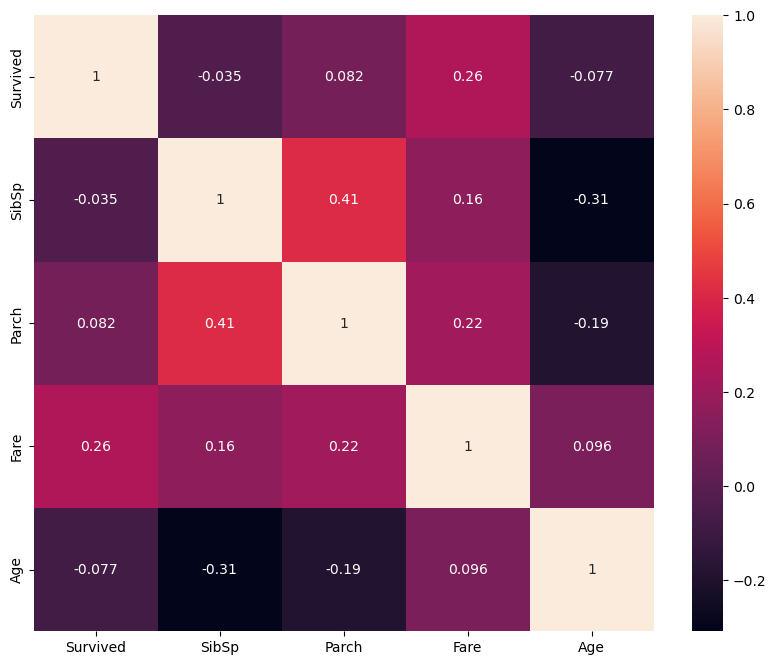

In [14]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot=True)

In [17]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

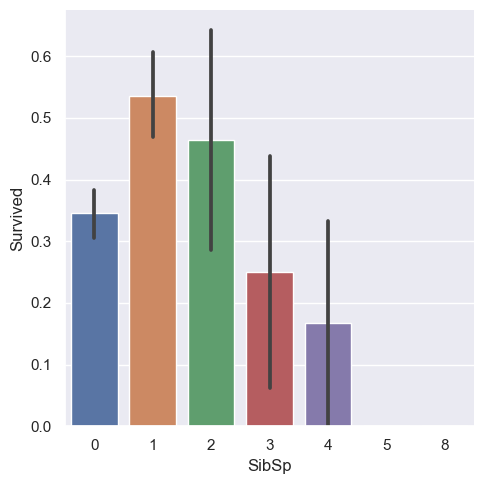

In [21]:
sns.catplot(x='SibSp', y='Survived', data = data, kind='bar')

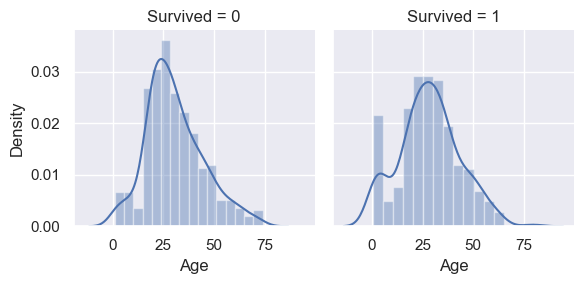

In [35]:
age_visual = sns.FacetGrid(data, col='Survived')
age_visual = age_visual.map(sns.distplot, "Age")

# Sex analysis

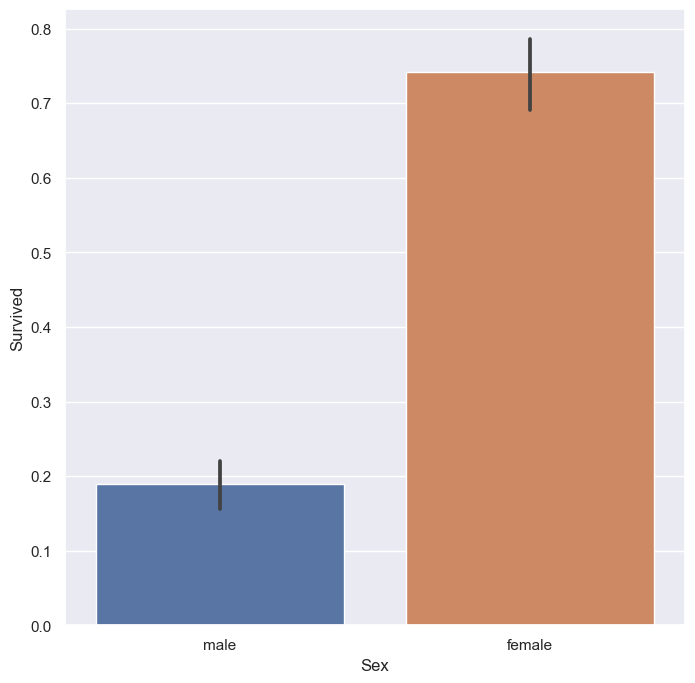

In [29]:
plt.figure(figsize=(8, 8))
age_plot = sns.barplot(data=data, x='Sex', y='Survived')

In [31]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


# P Class analysis

<Axes: xlabel='Pclass', ylabel='Survived'>

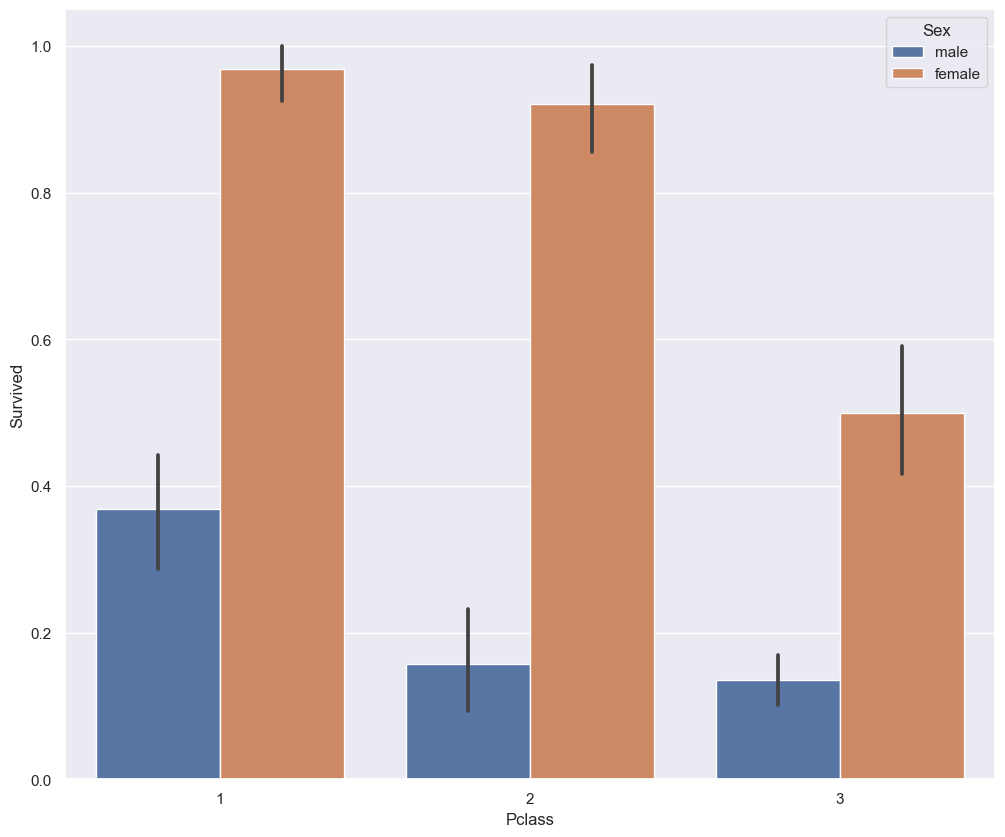

In [33]:
sns.barplot(data=data, x='Pclass', y='Survived', hue='Sex')

# Embarked

In [36]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
data.Embarked.fillna("S", inplace=True)

In [39]:
data.Embarked.isnull().sum()

0

<Axes: xlabel='Embarked', ylabel='Survived'>

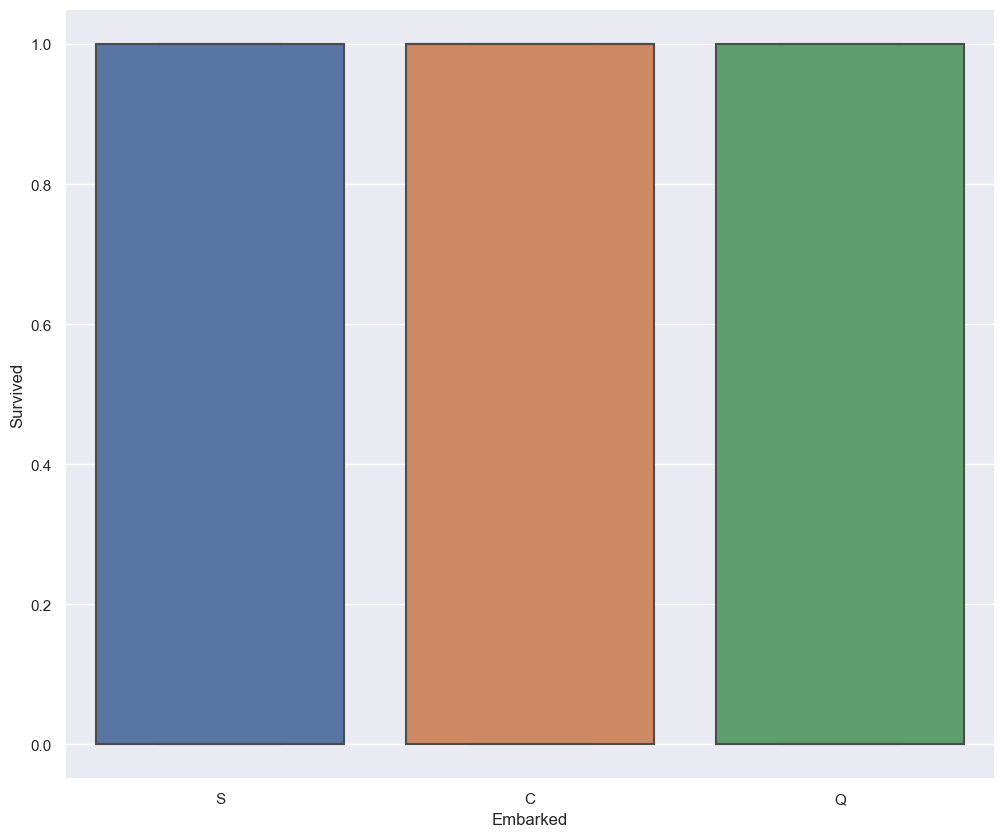

In [44]:
sns.boxplot(data=data, x='Embarked', y='Survived')

In [41]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

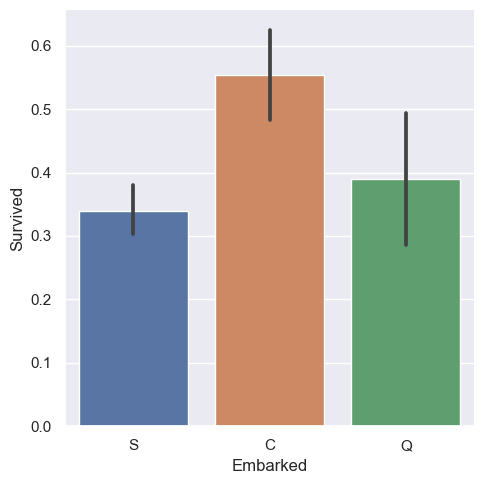

In [42]:
g = sns.catplot(x="Embarked", y='Survived', data=data, kind='bar')

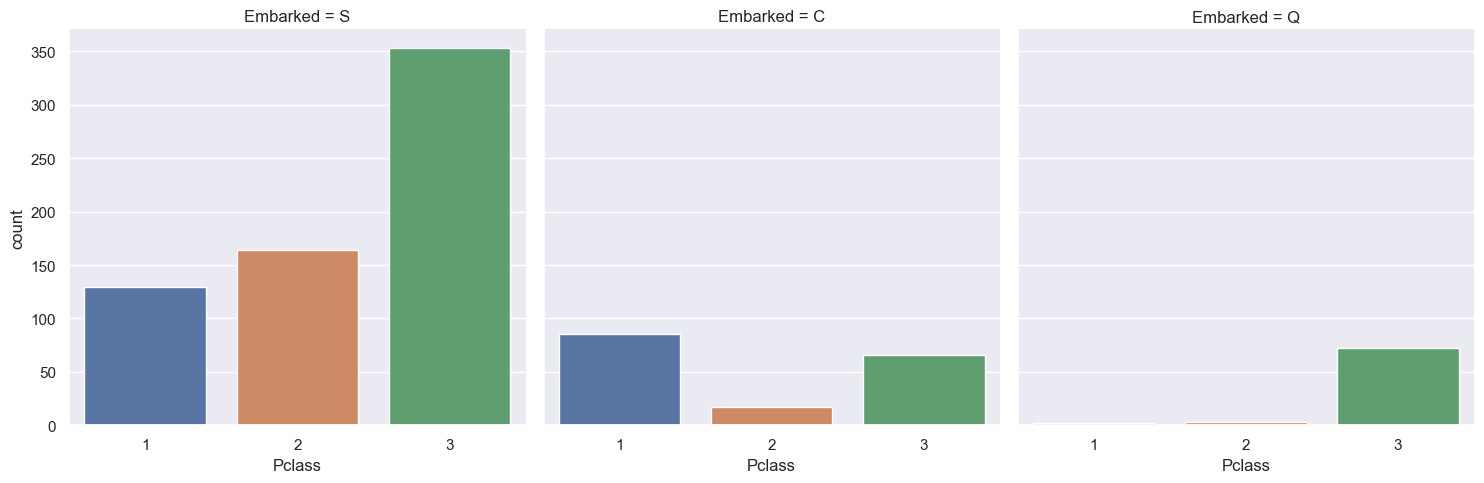

In [53]:
sns.catplot(data=data, x='Pclass', col='Embarked', kind='count')


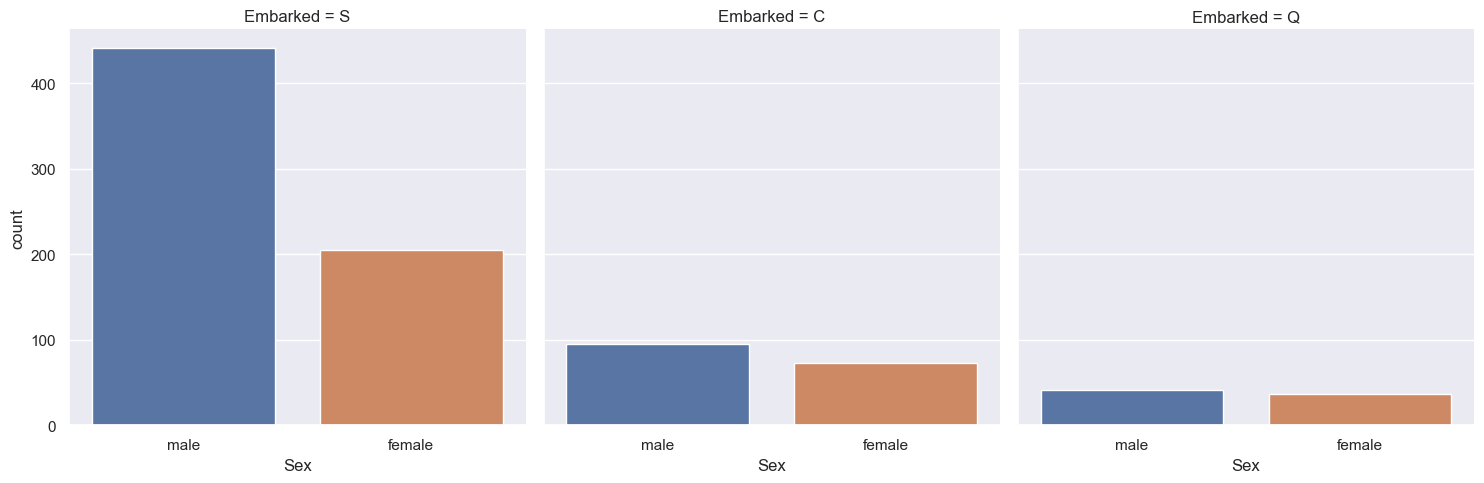

In [54]:
sns.catplot(data=data, x='Sex', col='Embarked', kind='count')

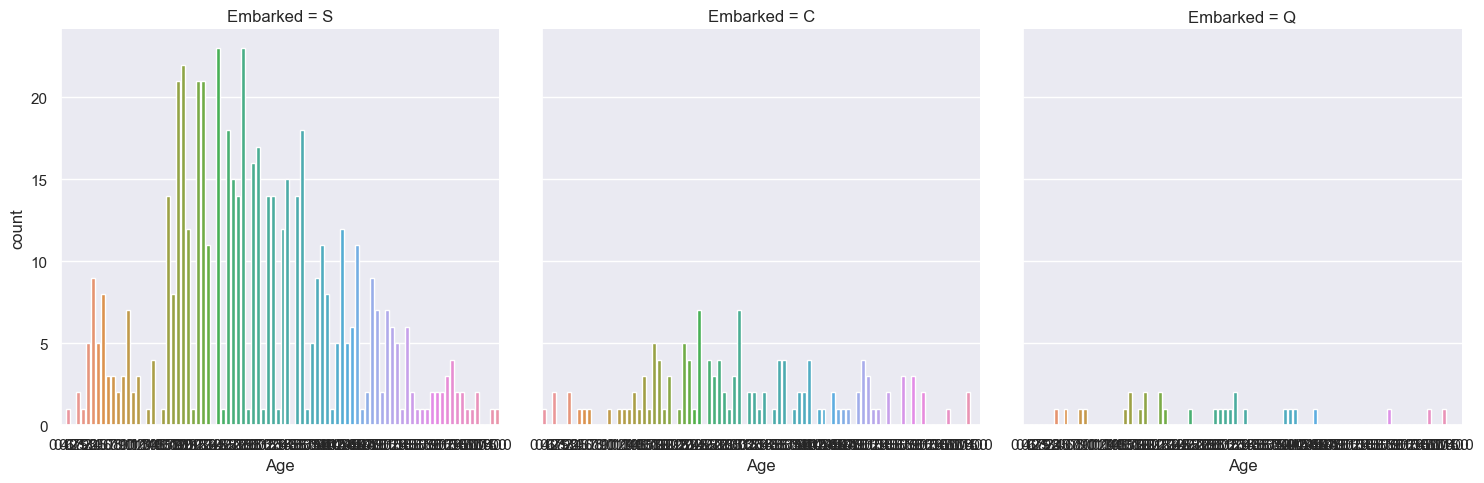

In [55]:
sns.catplot(data=data, x='Age', col='Embarked', kind='count')

# Preparing data for our model

In [56]:
data = pd.read_csv('train.csv')

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
mean_age = data.Age.mean()

In [60]:
mean_age

29.69911764705882

In [61]:
standard_deviation_age = data.Age.std()

In [62]:
standard_deviation_age

14.526497332334044

In [65]:
null_indices = data.Age.isnull()

In [66]:
null_indices

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [68]:
null_indices_new = data[data.Age.isnull()].index

In [69]:
null_indices_new

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [71]:
random_age = np.random.randint(mean_age-standard_deviation_age, mean_age+standard_deviation_age, size=177)

In [73]:
a = data.Age.copy()

In [75]:
a[np.isnan(a)]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [77]:
a[np.isnan(a)] = random_age

In [78]:
a.isnull().sum()

0

In [79]:
a.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [80]:
data.Age = a

In [81]:
data.Age.isnull().sum()

0

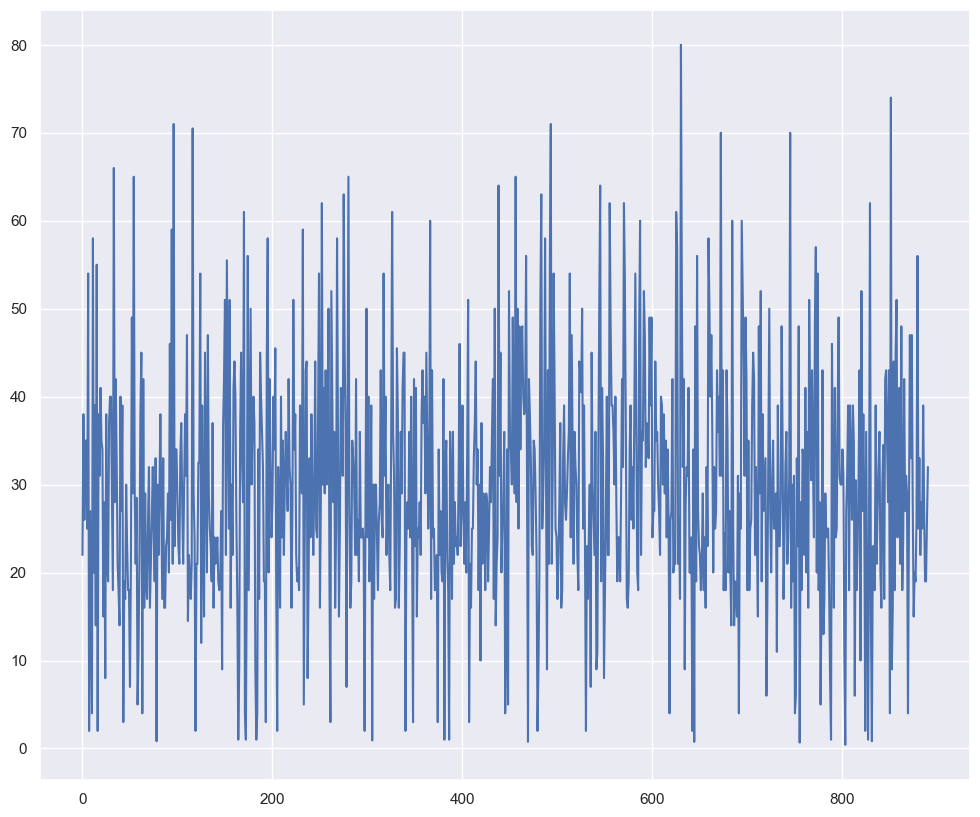

In [82]:
plt.plot(data.Age)

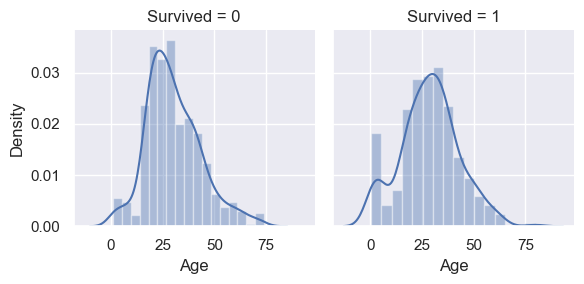

In [85]:
new_age_visual = sns.FacetGrid(data, col='Survived')
new_age_visual = new_age_visual.map(sns.distplot, "Age")

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
data['Embarked'] = data['Embarked'].fillna('S')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
col_to_drop = ['PassengerId', 'Cabin', 'Name', 'Ticket']
data.drop(col_to_drop, inplace=True, axis=1)

In [93]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
genders = {'male': 0, 'female': 1}
data.Sex = data.Sex.map(genders)

In [95]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [96]:
ports = {"S": 0, "C": 1, "Q": 2}
data.Embarked = data.Embarked.map(ports)

In [97]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [103]:
x = data.drop(data.columns[0], axis=1)
y = data["Survived"]

In [105]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  19.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Classification

In [115]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
fr_classifier = RandomForestClassifier(n_estimators=1000)

In [117]:
logreg.fit(scaled_x_train, y_train)
svc_classifier.fit(scaled_x_train, y_train)
dt_classifier.fit(scaled_x_train, y_train)
knn_classifier.fit(scaled_x_train, y_train)
fr_classifier.fit(scaled_x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [118]:
logreg_pred = logreg.predict(x_test)
svc_classifier_pred = svc_classifier.predict(x_test)
dt_classifier_pred = dt_classifier.predict(x_test)
knn_classifier_pred = knn_classifier.predict(x_test)
fr_classifier_pred = fr_classifier.predict(x_test)

# Accuracy

In [119]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(logreg_pred, y_test)
svc_classifier_acc = accuracy_score(y_test, svc_classifier_pred)
dt_classifier_acc = accuracy_score(y_test, dt_classifier_pred)
knn_classifier_acc = accuracy_score(y_test, knn_classifier_pred)
fr_classifier_acc = accuracy_score(y_test, fr_classifier_pred)

In [121]:
print(f"Accuracy Score for Logistic Regression: {round(logreg_acc*100, 2)}")
print(f"Accuracy Score for Support Vector Classification: {round(svc_classifier_acc*100, 2)}")
print(f"Accuracy Score for Decision Tree Classification: {round(dt_classifier_acc*100, 2)}")
print(f"Accuracy Score for KNN Classification: {round(knn_classifier_acc*100, 2)}")
print(f"Accuracy Score for Random Forest Classification: {round(fr_classifier_acc*100, 2)}")

Accuracy Score for Logistic Regression: 80.97
Accuracy Score for Support Vector Classification: 81.72
Accuracy Score for Decision Tree Classification: 74.63
Accuracy Score for KNN Classification: 80.22
Accuracy Score for Random Forest Classification: 80.22
